<a href="https://colab.research.google.com/github/ai-studio-google-3a/youtube-video-virality-prediction/blob/main/YouTube_Video_Virality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Team 3A Google Colab Notebook**

Import Datatset and Tools

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from datetime import datetime
import json

# # Load Dataset Here
df = pd.read_csv("US_youtube_trending_data.csv", on_bad_lines='skip', engine='python')
with open('US_category_id.json', 'r') as f:
    categories = json.load(f)

#The on_bad_lines argument will skip any malformed lines and the engine argument set to python will use the python parsing engine, which is more flexible


# Exploratory Data Analysis

In [ ]:
print(df.shape)
df.head()

(125542, 16)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [ ]:
# Delete Features that are not needed

df = df.drop(columns=['tags'])
df = df.drop(columns=['video_id'])
df = df.drop(columns=['channelId'])
df = df.drop(columns=['thumbnail_link'])

# Cleaning (removing videos with comments and ratings disabled)

df = df.drop(df[df['view_count'] == 0].index)
df = df[df['comments_disabled'] == False]
df = df[df['ratings_disabled'] == False]
df.head()

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...


In [ ]:
def calculate_time_to_trend(row):
    trending_date = datetime.strptime(row['trending_date'], '%Y-%m-%dT%H:%M:%SZ')
    published_at = datetime.strptime(row['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
    time_difference = (trending_date - published_at).total_seconds() / 60  # Convert to minutes
    return time_difference

df['time_to_trend_minutes'] = df.apply(calculate_time_to_trend, axis=1)
df.head()
df.tail()


,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,time_to_trend_minutes
125537,HIGHLIGHTS | Arsenal vs. Manchester United (Pr...,2022-04-23T14:04:26Z,DAZN Canada,17,2022-04-27T00:00:00Z,667554,9111,0,984,False,False,"April 23rd, 2022 -- Arsenal vs. Manchester Uni...",4915.566667
125538,Zach Bryan - Something In The Orange,2022-04-22T06:44:15Z,Zach Bryan,22,2022-04-27T00:00:00Z,382632,16791,0,673,False,False,It'll be fine by dusk light I'm telling you ba...,6795.750000
125539,"Spence vs Ugas HIGHLIGHTS: April 16, 2022 | PB...",2022-04-17T08:34:52Z,Premier Boxing Champions,17,2022-04-27T00:00:00Z,2694949,23866,0,5656,False,False,"(April 16, 2022) Errol Spence Jr. navigated tr...",13885.133333
125540,I remade my viewers mobs in minecraft,2022-04-23T13:00:30Z,halvetone,20,2022-04-27T00:00:00Z,935235,19728,0,2048,False,False,I remade my viewers mobs in minecraftI remade ...,4979.500000
125541,Cristiano Ronaldo Hat-Trick! | Manchester Unit...,2022-04-16T21:00:00Z,Manchester United,17,2022-04-27T00:00:00Z,8568551,222215,0,9205,False,False,Relive United's 3-2 win over Norwich at Old Tr...,14580.000000


Mapping categoryId with its corresponding name.

In [ ]:
#print(categories)
category_mapping = {str(item['id']): item['snippet']['title'] for item in categories['items']}
df['category_id_str'] = df['categoryId'].astype(str)
df['category_title'] = df['category_id_str'].map(category_mapping)
df.drop('category_id_str', axis=1, inplace=True)
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_title
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style


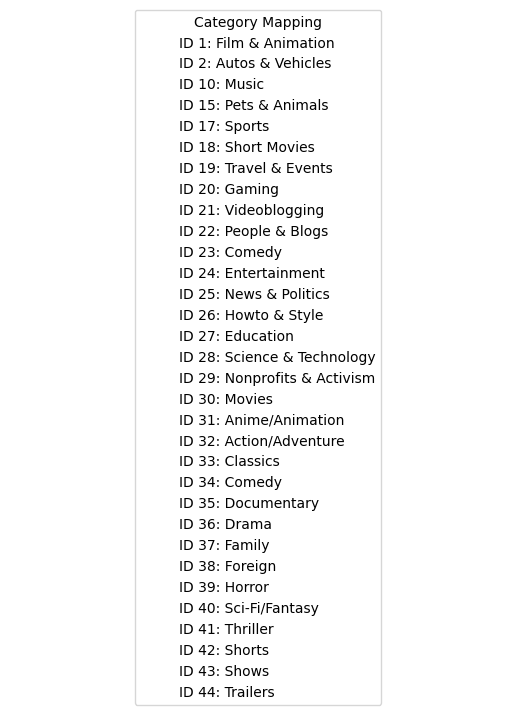

In [ ]:
legend_labels = [f"ID {cat_id}: {title}" for cat_id, title in category_mapping.items()]
handles = [plt.Line2D([0], [0], color='none', label=label) for label in legend_labels]
plt.legend(handles=handles, title="Category Mapping", loc='center')
plt.axis('off')
plt.show()

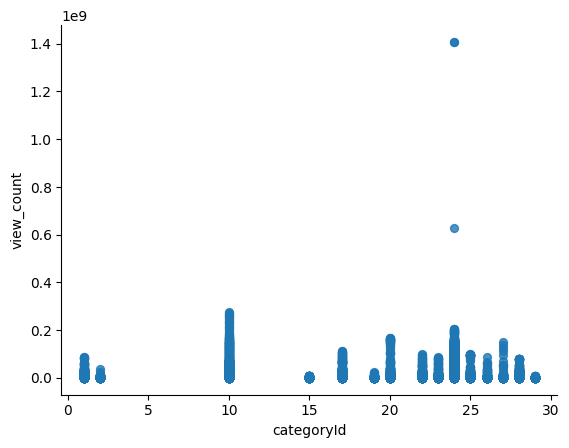

In [ ]:
# categoryId vs view_count

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='categoryId', y='view_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)



In [ ]:
# Comment vs View Count

from matplotlib import pyplot as plt

# Create the scatter plot
df.plot(kind='scatter', x='comment_count', y='view_count', s=32, alpha=.8)

# Add labels to the points
for i, row in df.iterrows():  # Iterate over each row of the DataFrame
    plt.annotate(row['title'], (row['comment_count'], row['view_count']))

# Customize the plot appearance
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Comment Count")
plt.ylabel("View Count")
plt.title("Comment Count vs. View Count")

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

ValueError: 
!@#$%$#!! || Dubov vs Carlsen || Airthings Masters (2020)
   ^
ParseException: Expected end of text, found '$'  (at char 3), (line:1, col:4)

<Figure size 640x480 with 1 Axes>

In [ ]:
# Time of Day

# 0 = morning, 1 = afternoon, 2 = night
def calculate_time_of_day(row):
    published_at = datetime.strptime(row['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
    time_difference = (published_at).hour
    if (time_difference < 10):
        return 0
    elif (time_difference < 17):
        return 1
    return 2;

df['time_posted'] = df.apply(calculate_time_of_day, axis=1)
df.head()

# Calculate Engagement Features

In [ ]:
# Calculate Engagement Rate (Likes + Dislikes + No. of Comments / View Count)

df['engagement_rate'] = round((df['likes'] + df['comment_count']) / df['view_count'])
df.head()


In [ ]:
# Like - Dislike Ratio
# df['like_dislike_ratio'] = df['likes'] / (df['dislikes'])

# Comment - View Ratio
df['comment_view_ratio'] = round(df['comment_count'] / df['view_count'])

df.head()

# Define Viral vs. Trending Thresholds

In [ ]:
# Define thresholds for trending & viral videos
# viral = 1,000,000 views in 24 hours
viral_threshold = 1000000

# Create trending/viral labels (1 = is viral/trending, 0 = isn't viral/trending)
df['is_viral'] = (df['view_count'] >= viral_threshold).astype(int)

df.head()

# Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# # Next steps - split data into training/testing sets
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
df = df.dropna()


# Select features to use in the model (try to use clustering?)
X = df[['time_to_trend_minutes', 'time_posted', 'likes', 'comment_view_ratio']]
y = df['view_count']

# # Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
# Metrics

# Print mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))

In [ ]:
# Visualization
plt.plot(X_test, prediction, color='blue', linewidth=3);

plt.xlabel('real view_count');
plt.ylabel('view_count prediction');

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

# Select features to use in the model
X = df[[ 'engagement_rate', 'comment_view_ratio']]
print(X)

y = df['is_viral']

# # Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 1. Create the  DecisionTreeClassifier model object below and assign to variable 'model'
model3 = DecisionTreeClassifier(max_depth=16, min_samples_leaf=1)

# 2. Fit the model to the training data below
model3.fit(X_train, y_train)

# 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
class_label_predictions = model3.predict(X_test)

# 4. Compute the accuracy here and save the result to the variable 'acc_score'
acc_score = accuracy_score(y_test, class_label_predictions)
print(acc_score)

In [ ]:
# K-Means Clustering to find features

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Features to use for clustering
cluster_features = df[['time_to_trend_minutes', 'engagement_rate', 'comment_view_ratio', 'likes']]

# standardize features
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

# define the number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)


kmeans.fit(cluster_features_scaled)

# assign cluster labels to each data point
df['cluster'] = kmeans.labels_

# plot
plt.figure(figsize=(10, 6))
plt.scatter(df['time_to_trend_minutes'], df['engagement_rate'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Time to Trend (minutes)')
plt.ylabel('Engagement Rate')
plt.title(f'KMeans Clustering with {n_clusters} Clusters')
plt.colorbar(label='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



In [ ]:
# NLP - Title


